In [164]:
import sys
import pandas as pd
import numpy as np
import sklearn
from sklearn import datasets
from sklearn import neighbors 
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns


print('python version : {}'.format(sys.version))
print('pandas version : {}'.format(pd.__version__))
print('numpy version : {}'.format(np.__version__))
print('sklearn version : {}'.format(sklearn.__version__))
print('seaborn version : {}'.format(sns.__version__))
print('matplotlib version : {}'.format(matplotlib.__version__))

python version : 3.9.7 (default, Sep 16 2021, 16:59:28) [MSC v.1916 64 bit (AMD64)]
pandas version : 1.3.4
numpy version : 1.20.3
sklearn version : 0.24.2
seaborn version : 0.11.2
matplotlib version : 3.4.3


In [165]:
# read the data in
df = pd.read_csv('titanic.csv')
df.head()

,PassengerId,Name,PClass,Age,Sex,Survived
0,1.0,"Allen, Miss Elisabeth Walton",1st,29.00,female,1.0
1,2.0,"Allison, Miss Helen Loraine",1st,2.00,female,0.0
2,3.0,"Allison, Mr Hudson Joshua Creighton",1st,30.00,male,0.0
3,4.0,"Allison, Mrs Hudson JC (Bessie Waldo Daniels)",1st,25.00,female,0.0
4,5.0,"Allison, Master Hudson Trevor",1st,0.92,male,1.0


In [166]:
# check the null value in dataframe
df.isnull().sum()

PassengerId     25
Name            25
PClass          25
Age            573
Sex             25
Survived        25
dtype: int64

In [167]:
# drop the rows with all Nan
df.dropna(axis=0, how='all', thresh=None, subset=None, inplace=True)

In [168]:
df.isnull().sum()

PassengerId      0
Name             0
PClass           0
Age            548
Sex              0
Survived         0
dtype: int64

In [169]:
# convert Sex to catergorical value
df['Sex'].replace({'male':0, 'female':1}, inplace = True)
df.head()

,PassengerId,Name,PClass,Age,Sex,Survived
0,1.0,"Allen, Miss Elisabeth Walton",1st,29.00,1,1.0
1,2.0,"Allison, Miss Helen Loraine",1st,2.00,1,0.0
2,3.0,"Allison, Mr Hudson Joshua Creighton",1st,30.00,0,0.0
3,4.0,"Allison, Mrs Hudson JC (Bessie Waldo Daniels)",1st,25.00,1,0.0
4,5.0,"Allison, Master Hudson Trevor",1st,0.92,0,1.0


In [170]:
# convert PClass to catergorical value
df['PClass'] = df['PClass'].str.extract('(\d+)')
df.head()

,PassengerId,Name,PClass,Age,Sex,Survived
0,1.0,"Allen, Miss Elisabeth Walton",1,29.00,1,1.0
1,2.0,"Allison, Miss Helen Loraine",1,2.00,1,0.0
2,3.0,"Allison, Mr Hudson Joshua Creighton",1,30.00,0,0.0
3,4.0,"Allison, Mrs Hudson JC (Bessie Waldo Daniels)",1,25.00,1,0.0
4,5.0,"Allison, Master Hudson Trevor",1,0.92,0,1.0


In [171]:
# try to get the titles in there names
df['Title'] = df['Name'].str.extract(' ([A-Za-z]+)', expand=True)
df

,PassengerId,Name,PClass,Age,Sex,Survived,Title
0,1.0,"Allen, Miss Elisabeth Walton",1,29.00,1,1.0,Miss
1,2.0,"Allison, Miss Helen Loraine",1,2.00,1,0.0,Miss
2,3.0,"Allison, Mr Hudson Joshua Creighton",1,30.00,0,0.0,Mr
3,4.0,"Allison, Mrs Hudson JC (Bessie Waldo Daniels)",1,25.00,1,0.0,Mrs
4,5.0,"Allison, Master Hudson Trevor",1,0.92,0,1.0,Master
...,...,...,...,...,...,...,...
1277,1278.0,"Zakarian, Mr Artun",3,27.00,0,0.0,Mr
1278,1279.0,"Zakarian, Mr Maprieder",3,26.00,0,0.0,Mr
1279,1280.0,"Zenni, Mr Philip",3,22.00,0,0.0,Mr
1280,1281.0,"Lievens, Mr Rene",3,24.00,0,0.0,Mr


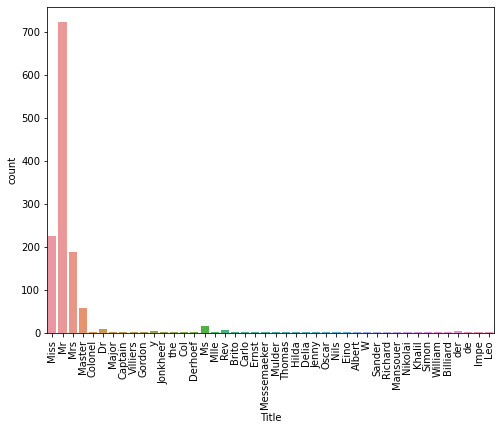

In [172]:
plt.figure(figsize=(8,6))
sns.countplot(x= "Title",data = df)
plt.xticks(rotation='90')
plt.show()

In [173]:
print(df.groupby('Title')['Age'].median())

Title
Albert          NaN
Billiard        NaN
Brito           NaN
Captain        70.0
Carlo          25.0
Col            58.0
Colonel        50.5
Delia           NaN
Derhoef        61.0
Dr             44.0
Eino           20.0
Ernst          18.0
Gordon         48.5
Hilda          22.0
Impe           30.0
Jenny          28.0
Jonkheer        NaN
Khalil          NaN
Leo            29.0
Major          48.5
Mansouer        NaN
Master          4.0
Messemaeker    36.0
Miss           21.0
Mlle            NaN
Mr             30.0
Mrs            37.5
Ms              NaN
Mulder         30.0
Nikolai         NaN
Nils           27.0
Oscar          26.0
Rev            40.0
Richard         NaN
Sander          NaN
Simon           NaN
Thomas          NaN
Villiers        NaN
W               NaN
William         NaN
de             36.0
der            28.0
the            27.0
y              28.0
Name: Age, dtype: float64


In [174]:
# fill the missing value for Age column with median of its title
titles = list(df.Title.unique())
for title in titles:
    age = df.groupby('Title')['Age'].median().loc[title]
    if age == None:
        df.loc[(df.Age.isnull()) & (df.Title == title),'Age'] = None
    else:
        df.loc[(df.Age.isnull()) & (df.Title == title),'Age'] = age

In [175]:
df.isnull().sum()

PassengerId     0
Name            0
PClass          0
Age            36
Sex             0
Survived        0
Title           0
dtype: int64

In [176]:
print(df.groupby('Sex')['Age'].median())

Sex
0    30.0
1    25.0
Name: Age, dtype: float64


In [177]:
# fill the missing value for Age column with median of its Sex
sexes = list(df.Sex.unique())
for s in sexes:
    ss = df.groupby('Sex')['Age'].median().loc[s]
    df.loc[(df.Age.isnull()) & (df['Sex'] == s),'Age'] = ss

In [178]:
df.isnull().sum()

PassengerId    0
Name           0
PClass         0
Age            0
Sex            0
Survived       0
Title          0
dtype: int64

In [179]:
# only select the features we want
features = ['PClass', 'Age', 'Sex']
X = df[features]
y = df['Survived']

In [180]:
# split the data into train and test
XTrain, XTest, yTrain, yTest = train_test_split(X, y, test_size=0.3,
                                                random_state=1)

In [181]:
Ks = np.arange(1, round(0.2*len(XTrain) + 1))
accuracies_train=[]
accuracies_test = []
for k in Ks:
    knn = neighbors.KNeighborsClassifier(n_neighbors=k)
    knn.fit(X, y)
    accuracy_train = knn.score(XTrain, yTrain)
    accuracies_train.append(accuracy_train)
    accuracy_test = knn.score(XTest, yTest)
    accuracies_test.append(accuracy_test)

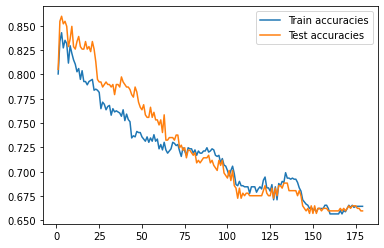

In [182]:
plt.plot(Ks, accuracies_train, label = 'Train accuracies')
plt.plot(Ks, accuracies_test, label = 'Test accuracies')
plt.legend()
plt.show()

In [183]:
# get the highest accuracires' K
print(accuracies_train.index(max(accuracies_train)))
print(accuracies_test.index(max(accuracies_test)))

2
2


In [184]:
print(max(accuracies_train))
print(max(accuracies_test))

0.842809364548495
0.8597402597402597
